In [12]:
# Libraries for reading, cleaning and plotting the dataa
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

# Libraries for models 
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [24]:
def linear_model():
    '''This function generates a linear model to predict change in sea level rise in cm (global mean) given historical co2 emissions in gt'''
    # Read in training data 
    df= pd.read_excel("slr_data.xlsx",sheet_name="data")
    #add a variable for change in sea level
    sl_chg =np.diff(df["sea_level (cm)"].to_numpy())
    #get the x variable without final year
    co2_gt = df["co2_gt"][:-1]
    #create a new df for co2 emission(x) and change in sea level (y)
    new_df = pd.DataFrame(zip(sl_chg,co2_gt),columns=["sl_chg","co2_gt"])
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
    #plot the correlation of sea level change and co2 emission
    ax1.plot(df["co2_gt"],df["sea_level (cm)"])
    ax1.set_xlabel("CO2 Emission This Year",)
    ax1.set_ylabel("Sea Level This Year (cm)")

    
    #plot the correlation of sea level change and co2 emission
    ax2.plot(new_df["co2_gt"],new_df["sl_chg"])
    ax2.set_xlabel("CO2 Emission Last Year")
    ax2.set_ylabel("Sea Level Change This Year (cm)")

    #split the data into training and dev datasets
    training_df = new_df.sample(frac=0.8)
    dev_df = new_df.drop(training_df.index)

    train_data = training_df.co2_gt.to_numpy().reshape(-1,1)
    train_label = training_df["sl_chg"]

    dev_data = dev_df.co2_gt.to_numpy().reshape(-1,1)
    dev_label = dev_df["sl_chg"]
    
    #fit a linear model
    model = LinearRegression()
    model.fit(train_data,train_label)

#     #score the model
    print("R2: ", model.score(dev_data,dev_label))
    return model

R2:  -0.47957766761758647


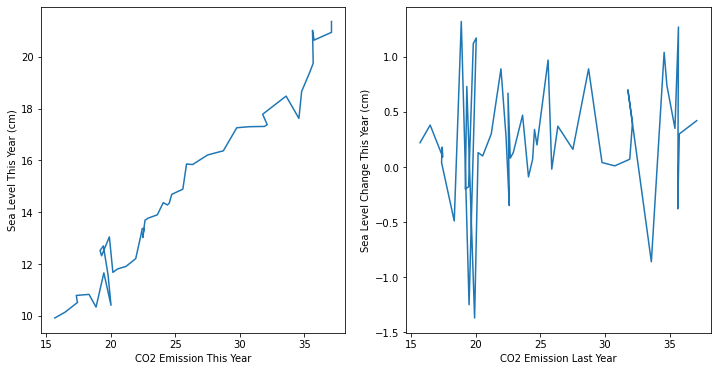

In [25]:
model = linear_model()

In [27]:
def gen_slr(gt):
    '''This function takes a new co2 emission in gt and gives slr in cm'''
    #predicts global mean sea level rise in cm.
    return model.predict(np.array([gt]).reshape(-1,1))

In [28]:
gen_slr(30)

array([0.22619296])

R2:  -0.06075746421321537


LinearRegression()

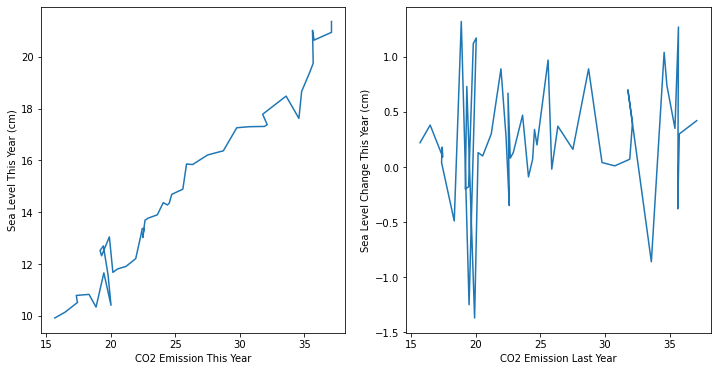

In [30]:
linear_model()